In [ ]:
import os
import sys
sys.path.append("./brats")
import numpy as np
import nibabel as nib


# Data Visualization

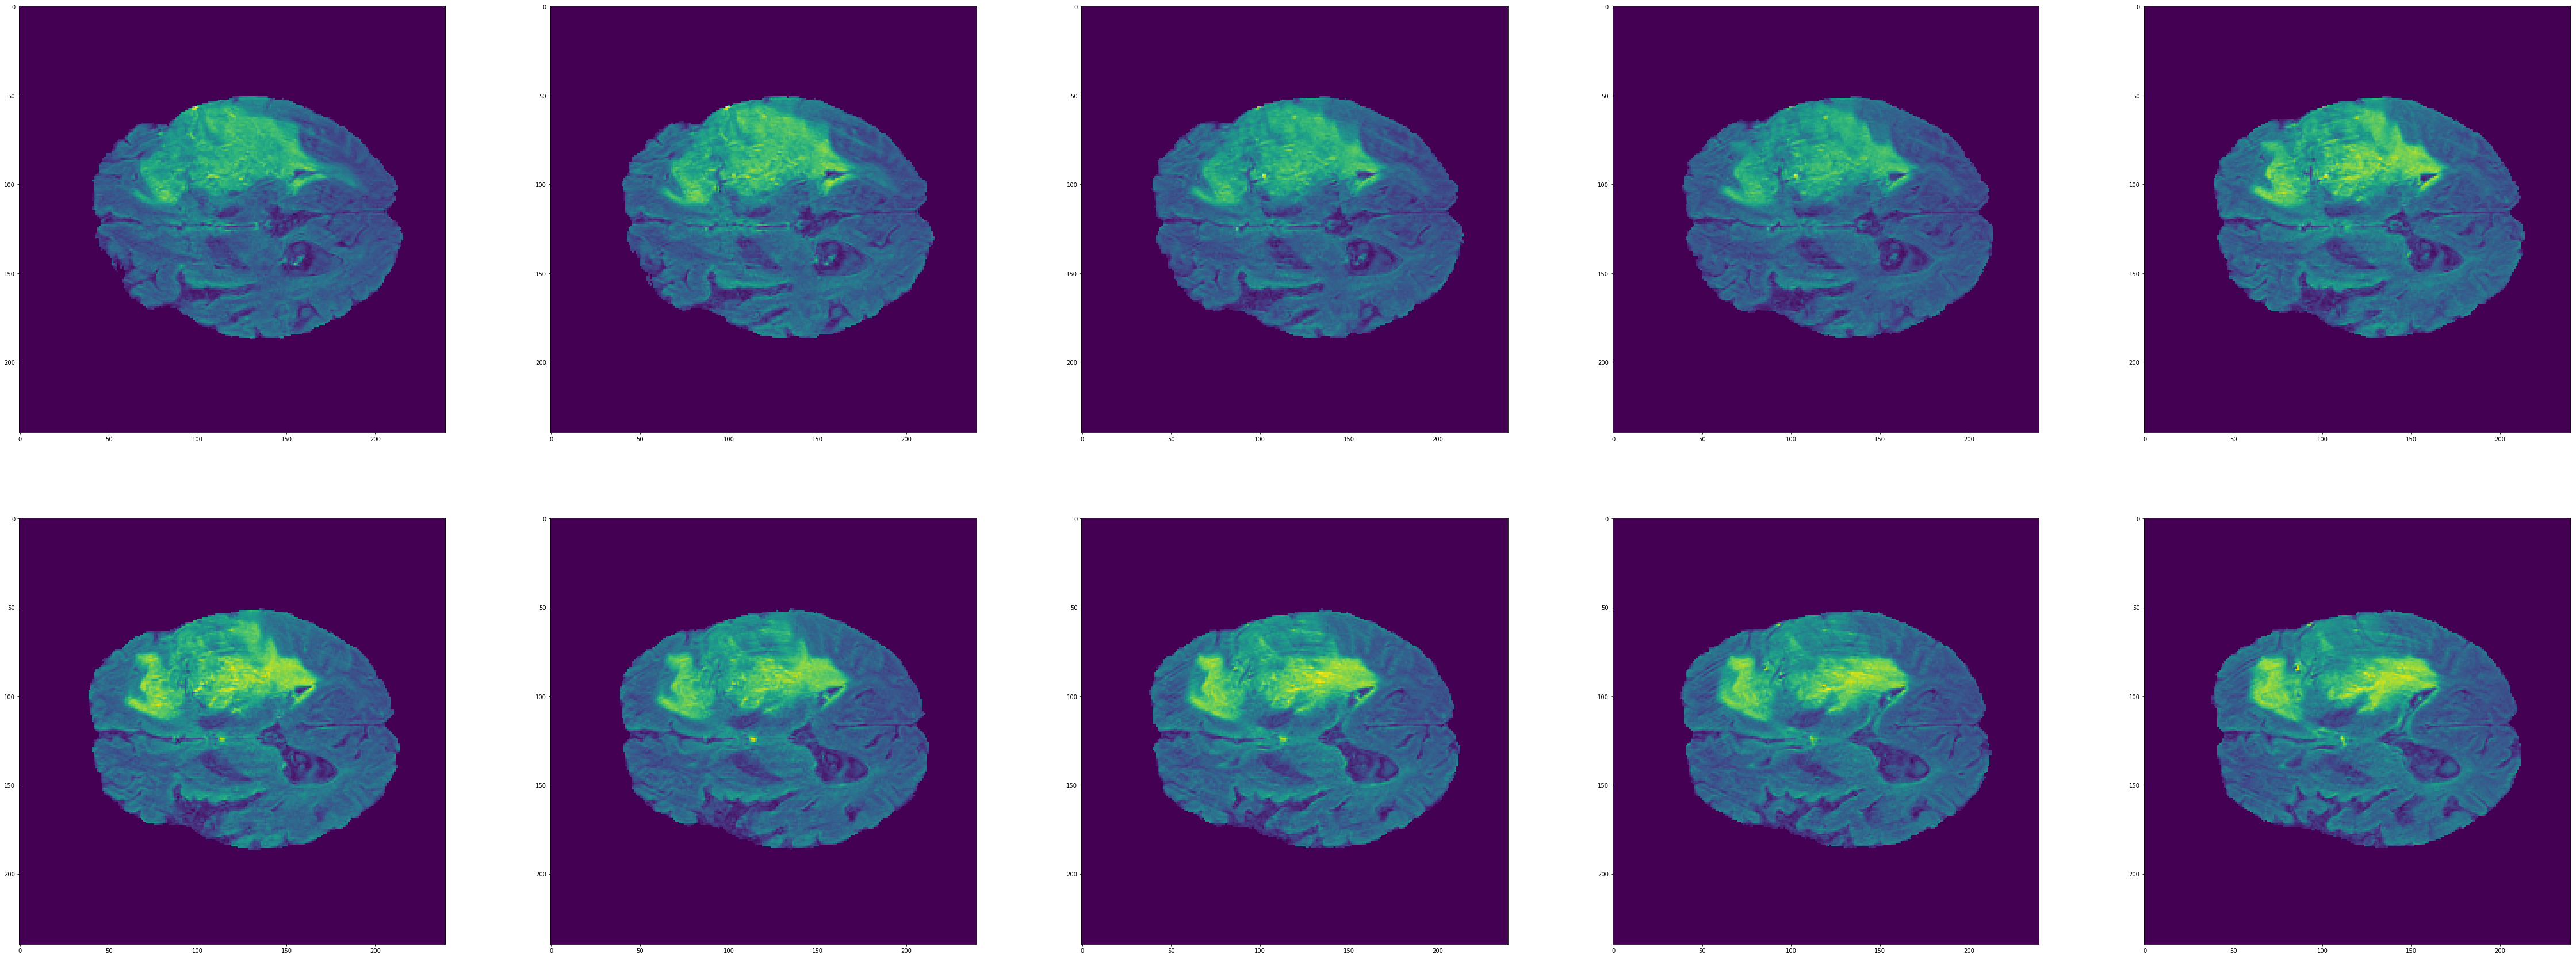

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fnamesz=np.load('/home/TRAINING/datasets/brats/testfnames.npz')
fnames= fnamesz.f.arr_0
testid=1
fname=fnames[testid]

img = nib.load(fname)
data = img.get_fdata()
        
plt.figure(figsize=(80,30))
for i, imgid in enumerate(range(60,70)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data[:,:,imgid])

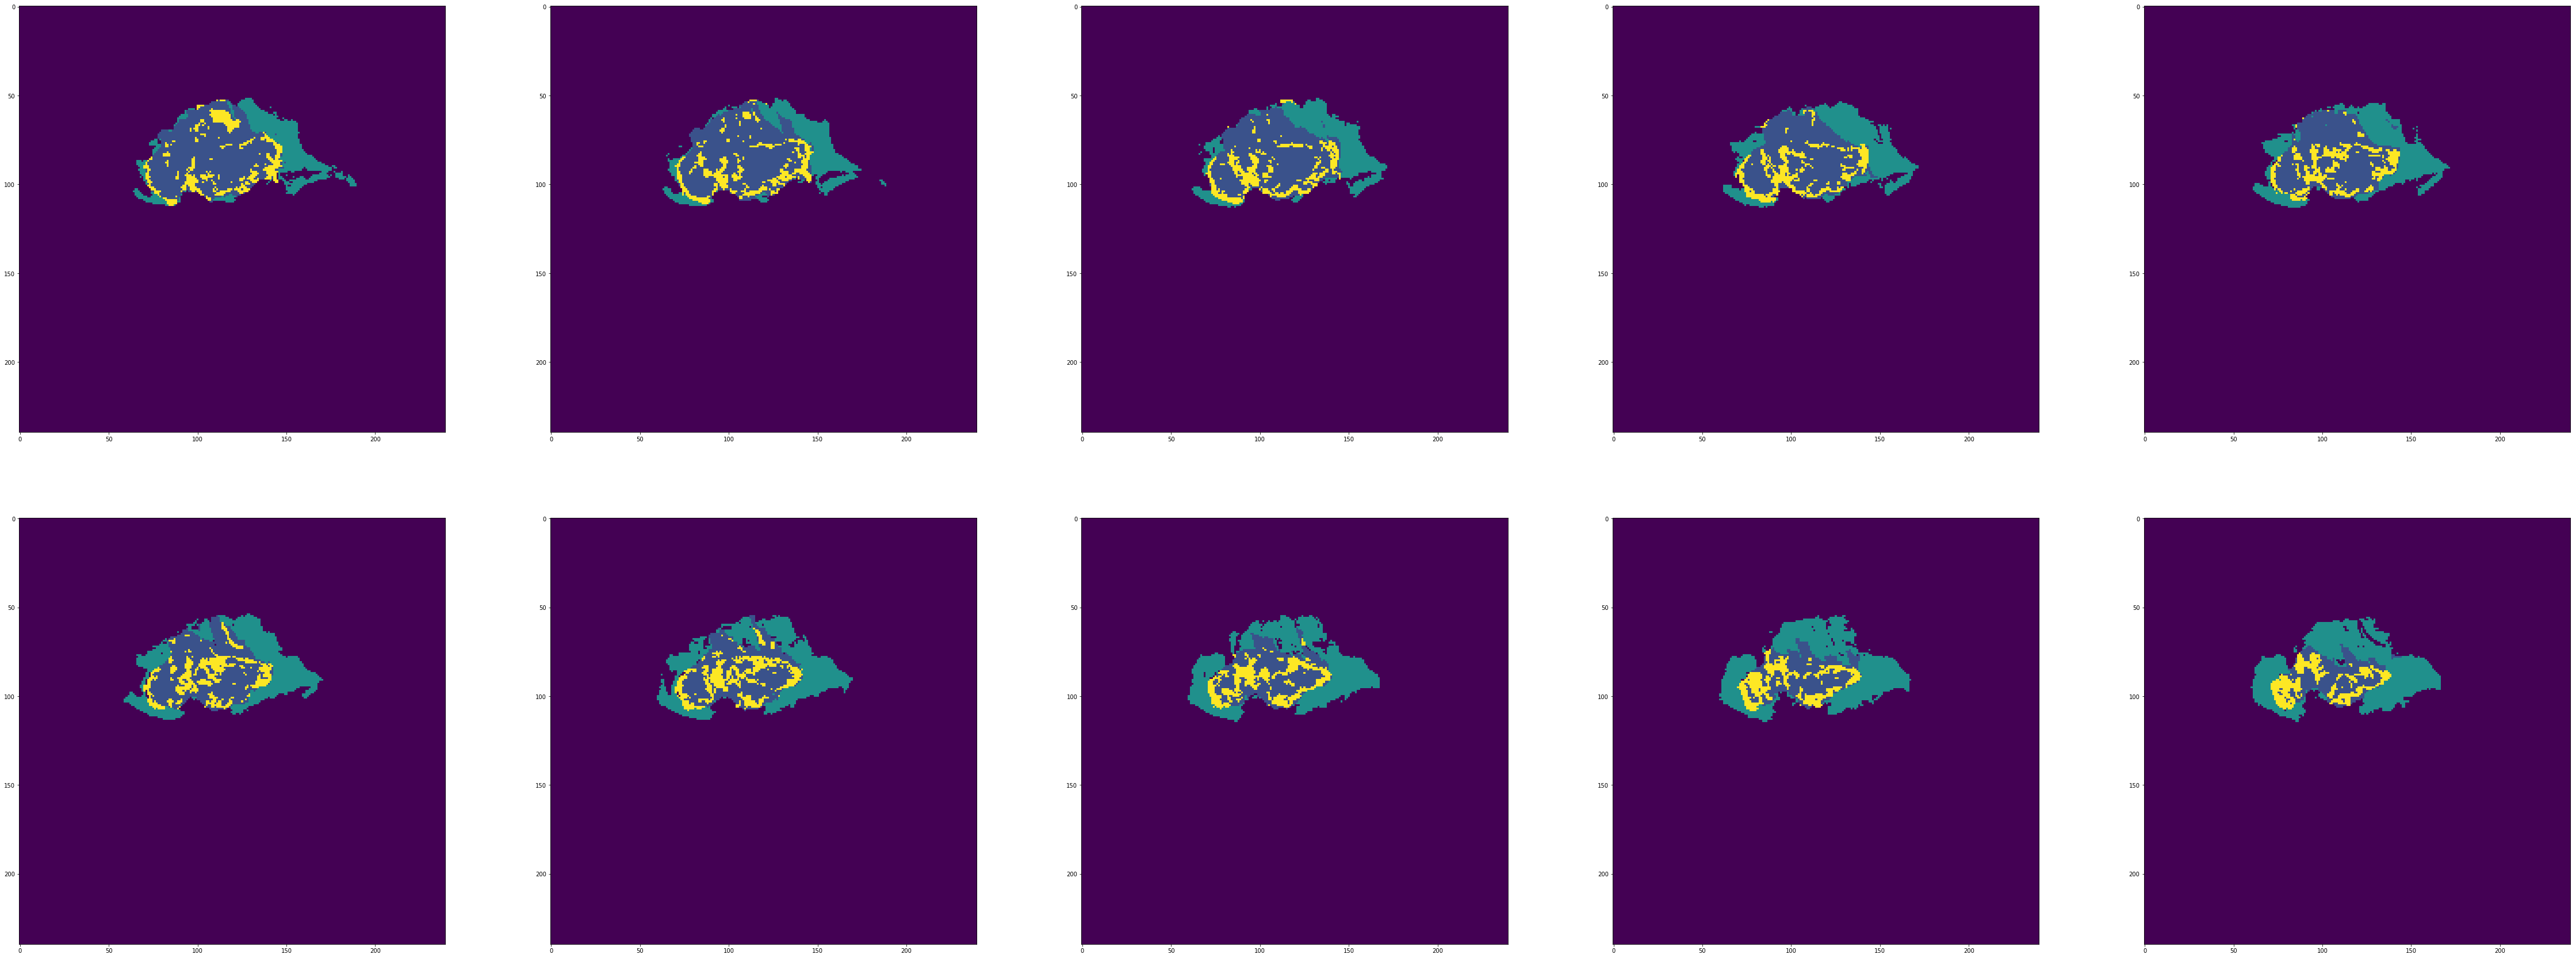

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fname=fnames[testid].replace('flair','seg')

img = nib.load(fname)
data = img.get_fdata()
        
plt.figure(figsize=(80,30))
for i, imgid in enumerate(range(60,70)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data[:,:,imgid])


# Data Pre-processing

In [4]:
already_processed=True
if already_processed==False:
    train_data=np.zeros((210,240,240,155))
    train_label=np.zeros((210,240,240,155))
    for subset in ['HGG/']: # There are two subsets available ['LGG/','HGG/']. We are working on one of them only
        data_path='/home/TRAINING/datasets/brats/'+subset 
        idxd=0;idxl=0
        for d in os.listdir(data_path):
            for f in os.listdir(os.path.join(data_path+d)):
                filename = os.path.join(data_path+d, f)
                if 'flair.nii.gz' in filename:
                    img = nib.load(filename)
                    data = img.get_fdata()
                    train_data[idxd,:]=data
                    idxd+=1
                if 'seg' in filename: # segmentation labels
                    img = nib.load(filename)
                    data = img.get_fdata()
                    train_label[idxl,:]=data
                    idxl+=1
        print('Subset',subset[:-1],' Total number of samples=',cnt)
    np.savez_compressed('/home/TRAINING/datasets/brats/hgg_data', train_data)
    np.savez_compressed('/home/TRAINING/datasets/brats/hgg_labels', train_label)
else:
    print('data processed and ready at /home/TRAINING/datasets/brats/')

data processed and ready at /home/TRAINING/datasets/brats/


# Training

In [6]:
import time
retrain=False
if retrain:
    ! cd brats; python train.py
else:
    for l in open('./brats/log.txt','r'):
        print(l.replace('\n',''))
        if 'Train' in l:
            time.sleep(0.5)


build vnet
  + Number of params: 179419
  + Cuda enabled= True
loading training set
number of classes= 1.0
loading test set
/home/nady/cas/brats/code/brats/vnet.py:134: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.softmax(out)
Train Epoch: 0.00 [4/170 (0%)]	Loss: 0.6260	Error: 19.234	 Dice: 0.080080
Train Epoch: 0.02 [8/170 (2%)]	Loss: 0.6618	Error: 33.637	 Dice: 0.030266
Train Epoch: 0.05 [12/170 (5%)]	Loss: 0.6084	Error: 19.523	 Dice: 0.078637
Train Epoch: 0.07 [16/170 (7%)]	Loss: 0.6290	Error: 29.046	 Dice: 0.056253
Train Epoch: 0.09 [20/170 (9%)]	Loss: 0.6222	Error: 21.861	 Dice: 0.068975
Train Epoch: 0.12 [24/170 (12%)]	Loss: 0.6071	Error: 23.294	 Dice: 0.111618
Train Epoch: 0.14 [28/170 (14%)]	Loss: 0.6035	Error: 10.337	 Dice: 0.183508
Train Epoch: 0.16 [32/170 (16%)]	Loss: 0.6216	Error: 12.445	 Dice: 0.116442
Train Epoch: 0.19 [36/170 (19%)]	Loss: 0.6120	Error: 19.157	 Dice: 0.121829
Tra

![Training Curve](brats/images/loss-error.png)


# Testing

Results ready
Top row contains the actual labels
Bottom row contains the generated predictions


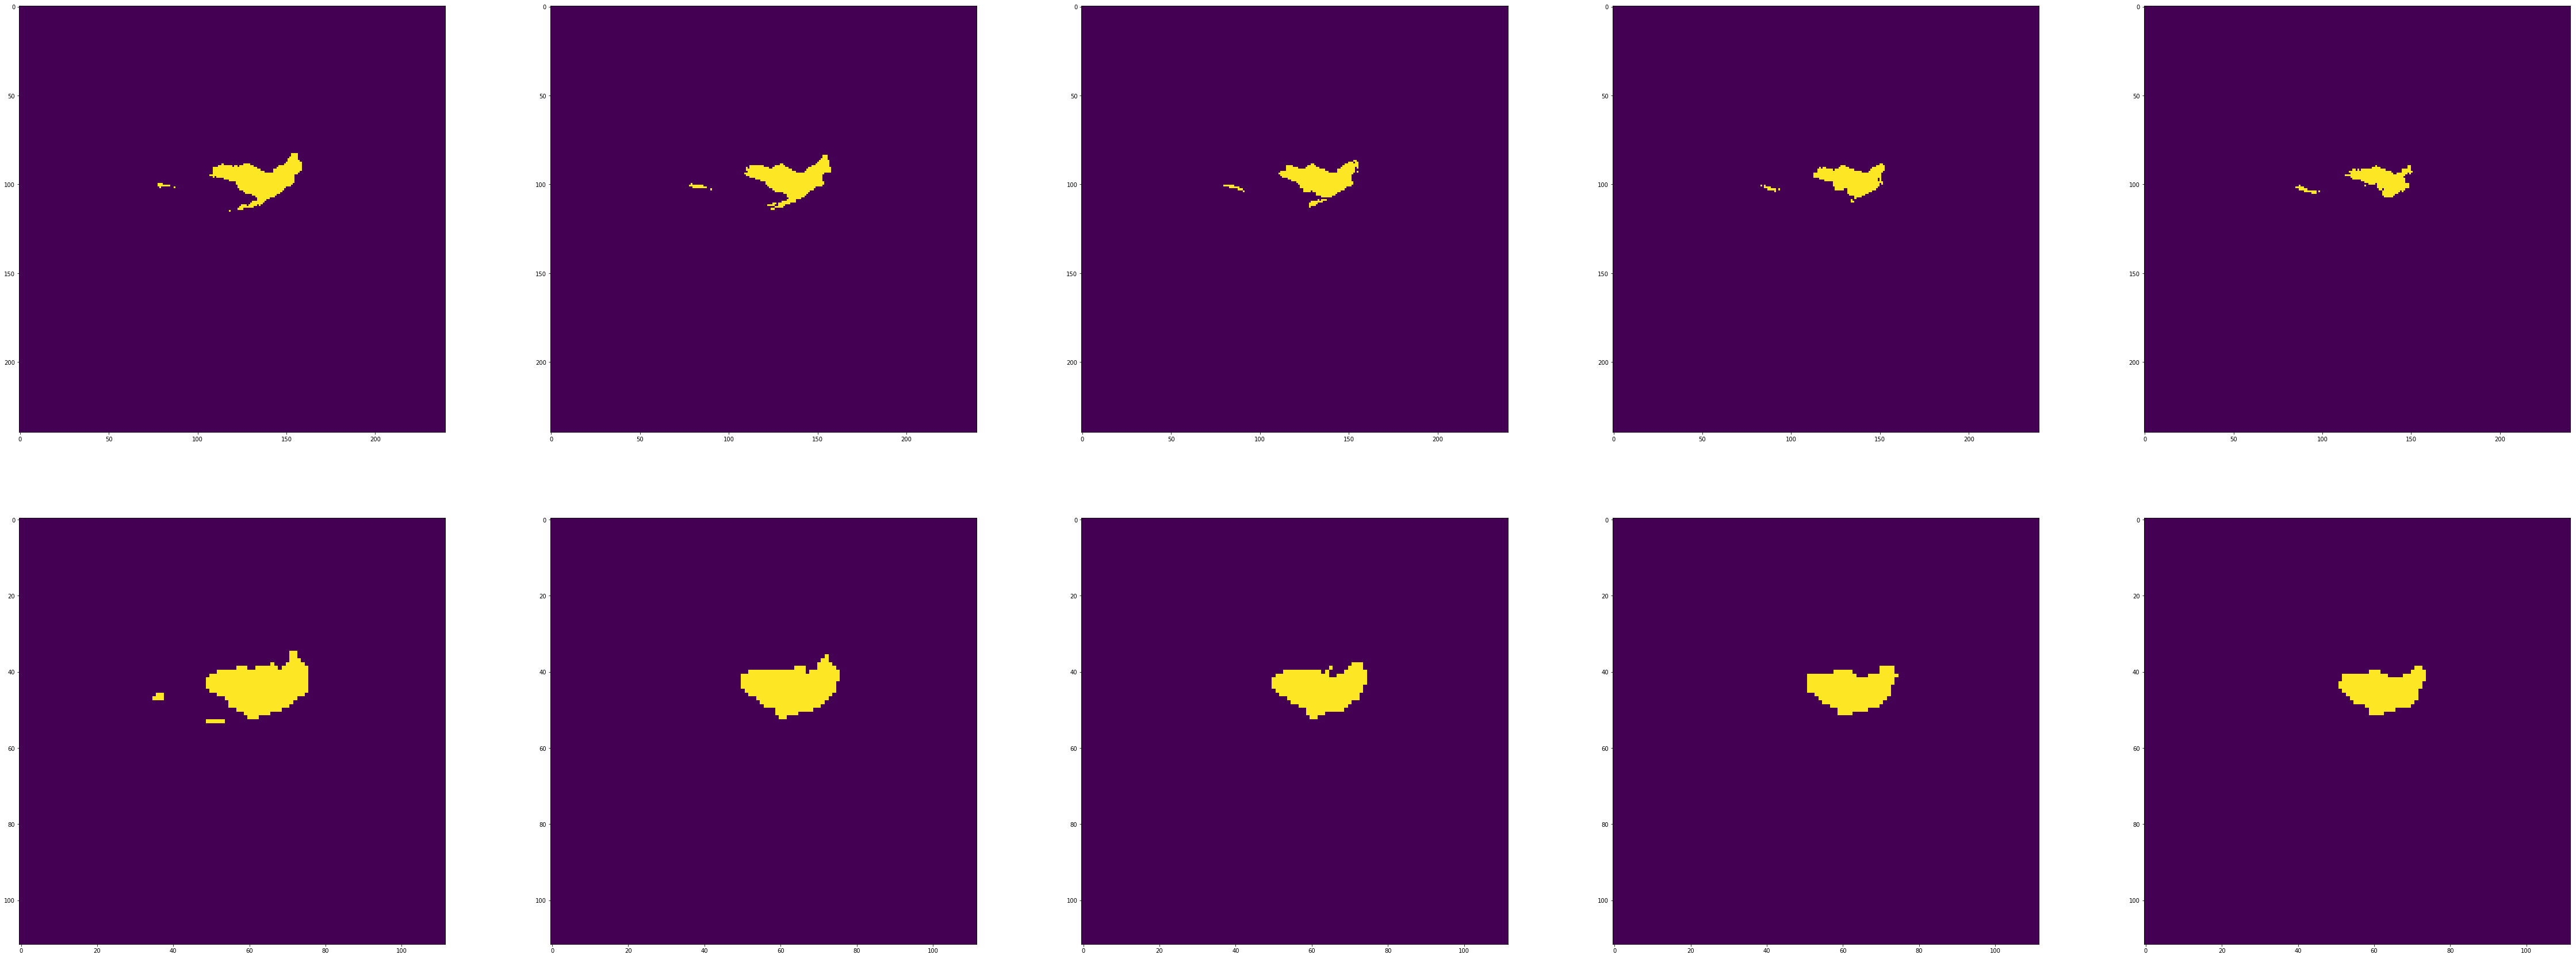

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

rerun_inference=False
if rerun_inference:
    ! cd brats; python train.py --resume ./work120/vnet.base.20180710_1933/vnet_model_best.pth.tar --i hgg_data120.npz --save output
else:
    print('Results ready')
    print('Top row contains the actual labels')
    print('Bottom row contains the generated predictions')

fname=fnames[testid].replace('flair','seg')
img = nib.load(fname)
labels = img.get_fdata()
fname='/home/TRAINING/datasets/brats/output/out{}.npz'.format(testid)
dataz = np.load(fname)
predictions= dataz.f.arr_0

plt.figure(figsize=(80,30))
for i, imgid in enumerate(range(85,95)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(labels[:,:,imgid] if i<5 else predictions[:,:,imgid-5])
